In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int

In [10]:
def adder(state: AgentState) -> AgentState:
  """This node adds the 2 numbers"""
  state["finalNumber"] = state["number1"] + state["number2"]

  return state

def subtractor(state: AgentState) -> AgentState:
  """This node subtracts the 2 numbers"""
  state["finalNumber"] = state["number1"] - state["number2"]

  return state

def decide_next_node(state: AgentState) -> AgentState:
  """This node will select the next node of the graph"""

  if state["operation"] == "+":
    return "addition_operation" #return the edge
  
  elif state["operation"] == "-":
    return "subtraction_operation"

In [11]:
graph = StateGraph(AgentState)

graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", subtractor)
graph.add_node('router', lambda state:state)  #passthrough function

graph.add_edge(START, 'router')

graph.add_conditional_edges(
  "router",
  decide_next_node,

  {
    #Edge: Node
    "addition_operation" : "adder_node",
    "subtraction_operation" : "subtractor_node"
  }
)

graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)

app = graph.compile()


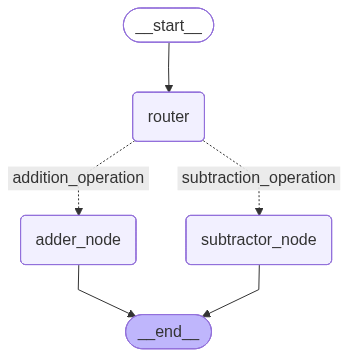

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state_1 = AgentState(number1 = 10, operation="-", number2 = 5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [14]:
initial_state_2 = AgentState(number1 = 10, operation="+", number2 = 5)
print(app.invoke(initial_state_2))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}
